In [3]:
#import the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
from sklearn import model_selection


In [4]:
pwd

'C:\\Users\\iahuj\\Jupyter Work'

In [5]:
#loading the dataset
data=pd.read_csv(r'C:\Users\iahuj\Downloads\Datasets\diabetes.csv')
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
#check the info and description of data 
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
# data[data.Pregnancies==17]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72,41,114,40.9,0.817,47,1


In [11]:
#check the documentation of corr function
data.corr?

In [12]:
#finding the correlation
corr = data.corr(method='pearson')
(corr)
# sns.heatmap(corr, 
#          xticklabels=corr.columns, 
#          yticklabels=corr.columns)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


0.2218981530339883

In [16]:
corr['Pregnancies']['Outcome']
#Get the corr value of each feature wrt Outcome 
corr_list=[abs(corr[arg]['Outcome']) for arg in data.columns[:-1]] #data.columns[:-1]
corr_list

[0.2218981530339883,
 0.4665813983068757,
 0.06506835955033308,
 0.07475223191831948,
 0.13054795488404808,
 0.29269466264444666,
 0.17384406565296076,
 0.23835598302719743]

In [17]:
#combine the name of feature with their corresponding corr values
corr_list=list(zip(corr_list,data.columns[:-1]))

In [19]:
type(np.sort(corr_list))
#sort the corr_list
np.sort(corr_list)

array([['0.2218981530339883', 'Pregnancies'],
       ['0.4665813983068757', 'Glucose'],
       ['0.06506835955033308', 'BloodPressure'],
       ['0.07475223191831948', 'SkinThickness'],
       ['0.13054795488404808', 'Insulin'],
       ['0.29269466264444666', 'BMI'],
       ['0.17384406565296076', 'DiabetesPedigreeFunction'],
       ['0.23835598302719743', 'Age']], dtype='<U32')

In [20]:
#sort the corr_list
print(type(corr_list.sort(reverse=True)))  #cars.sort(reverse=True) 
corr_list.sort(reverse=True)
corr_list

<class 'NoneType'>


[(0.4665813983068757, 'Glucose'),
 (0.29269466264444666, 'BMI'),
 (0.23835598302719743, 'Age'),
 (0.2218981530339883, 'Pregnancies'),
 (0.17384406565296076, 'DiabetesPedigreeFunction'),
 (0.13054795488404808, 'Insulin'),
 (0.07475223191831948, 'SkinThickness'),
 (0.06506835955033308, 'BloodPressure')]

In [21]:
#unzip the corr values and feature names
coerr,label=zip(*corr_list)
print(coerr)
print(label)

(0.4665813983068757, 0.29269466264444666, 0.23835598302719743, 0.2218981530339883, 0.17384406565296076, 0.13054795488404808, 0.07475223191831948, 0.06506835955033308)
('Glucose', 'BMI', 'Age', 'Pregnancies', 'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure')


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

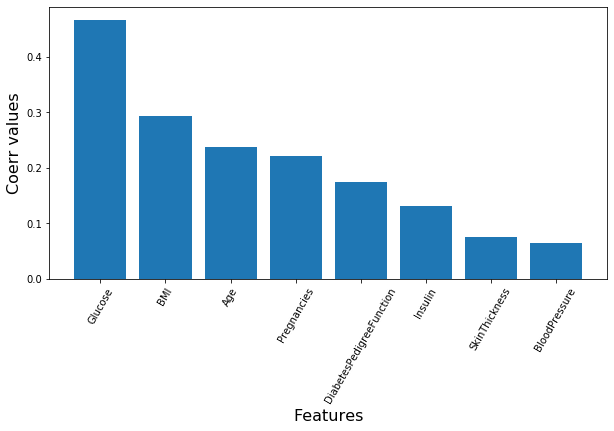

In [30]:
#plot the coerrealtion coef 
plt.figure(figsize=(10,5)) 
plt.bar(label,coerr)
plt.xlabel('Features',fontsize=16)
plt.ylabel('Coerr values',fontsize=16)
plt.xticks(rotation=60)
# plt.xticklabels((coerr))
# plt.xticks(rotation=45)

In [63]:
#geting the data ready for model fitting
X=data.iloc[: , :-1]
X


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [72]:
print((type(X)))
print((X.shape))


<class 'numpy.ndarray'>
(768, 8)


In [75]:
# geting the target variable ready for the model fitting
y=data.iloc[:,-1:]
y=y.values
print('Shape y :',y.shape)
print(type(y))

Shape y : (768, 1)
<class 'numpy.ndarray'>


# Using train_test_split

In [78]:
#get the training set and testing set ready
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (460, 8)
y_train shape: (460, 1)
X_test shape: (308, 8)
y_test shape: (308, 1)


# Decision Tree

In [144]:
#
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
tree_model.fit(X_train,y_train)
y_pred_train_tree = tree_model.predict(X_train)
y_pred_test_tree = tree_model.predict(X_test)
metrics.r2_score(y_test,y_pred_test_tree)

-0.1961165048543687

In [90]:
tree_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [111]:
from sklearn import metrics

scores=[]
scores_test=[]
for i in range(1,26):
    tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    tree_model.fit(X_train,y_train)
    y_pred_train_tree = tree_model.predict(X_train)
    y_pred_test_tree = tree_model.predict(X_test)
    scores.append(metrics.accuracy_score(y_train,y_pred_train_tree))
    scores_test.append(metrics.accuracy_score(y_test,y_pred_test_tree))
# print(metrics.confusion_matrix(y_train,y_pred_train_tree))
# print(metrics.accuracy_score(y_train,y_pred_train_tree))

#printing the accuracy score of train and test set
print('Train set',np.mean(scores))
print('Train set',scores)
print('Test set',np.mean(scores_test))
print('Test set',scores_test)

Train set 0.922608695652174
Train set [0.7521739130434782, 0.7565217391304347, 0.7652173913043478, 0.7956521739130434, 0.8195652173913044, 0.8369565217391305, 0.8717391304347826, 0.8847826086956522, 0.9130434782608695, 0.9239130434782609, 0.9434782608695652, 0.9521739130434783, 0.9565217391304348, 0.967391304347826, 0.9717391304347827, 0.9826086956521739, 0.9869565217391304, 0.991304347826087, 0.9956521739130435, 0.9978260869565218, 1.0, 1.0, 1.0, 1.0, 1.0]
Test set 0.7002597402597402
Test set [0.7402597402597403, 0.724025974025974, 0.724025974025974, 0.7435064935064936, 0.7337662337662337, 0.7207792207792207, 0.7272727272727273, 0.685064935064935, 0.7077922077922078, 0.7012987012987013, 0.6785714285714286, 0.7045454545454546, 0.698051948051948, 0.698051948051948, 0.6915584415584416, 0.6558441558441559, 0.711038961038961, 0.6688311688311688, 0.685064935064935, 0.6883116883116883, 0.6818181818181818, 0.6915584415584416, 0.685064935064935, 0.685064935064935, 0.6753246753246753]


Text(0, 0.5, 'Accuracy Score')

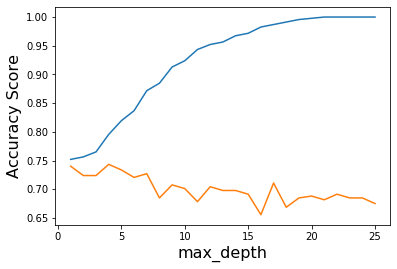

In [116]:
plt.plot(range(1,26) , scores )
plt.plot(range(1,26) , scores_test )
plt.xlabel('max_depth' ,fontsize=16)
plt.ylabel('Accuracy Score' ,fontsize=16)

In [148]:
p=data.iloc[[5]].values
p[:,:-1]
p
# tree_model.predict([[6 ,148 ,72 ,35 ,0 ,33.6,0.627,50]])
tree_model.predict(p[:,:-1])

array([0], dtype=int64)

# Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train,y_train)
y_pred_train_logreg = logreg_model.predict(X_train)
y_pred_test_logreg = logreg_model.predict(X_test)

print('Training data evaluation:',metrics.accuracy_score(y_train,y_pred_train_logreg))
print('Test data evaluation:',metrics.accuracy_score(y_test,y_pred_test_logreg))

# print(metrics.r2_score(y_test,y_pred_test_logreg))

Training data evaluation: 0.758695652173913
Test data evaluation: 0.7954545454545454
0.0810324413923752


C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Use Cross validation

In [162]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_model,X,y,cv=10)
scores.mean()


0.7357142857142858

In [161]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_model,X,y,cv=10)
scores.mean()


C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\iahuj\Anaconda3\lib\site-packages\sklearn\linear_

0.7669685577580314